In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4
import requests
import warnings
import re
import html
import unidecode
warnings.filterwarnings('ignore')
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
df = pd.read_csv('df_initial_32833.csv')

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='mixed')

In [ ]:
df['release_year'] = df['track_album_release_date'].dt.year

In [ ]:
#Sacar el idioma de las canciones en una lista

todas = list(df.track_id[:])

In [ ]:
import requests

api_key = 'e93fdea8fc062c7e9675c74485531a04'
idiomas_todas = []

n = 0

for spotify_track_id in todas:
    endpoint = f'https://api.musixmatch.com/ws/1.1/track.snippet.get?format=json&track_spotify_id={spotify_track_id}&apikey={api_key}'
    response = requests.get(endpoint)

    if response.status_code == 200:
        data = response.json()

        if data['message']['header']['status_code'] == 200:
            try:
                language = data['message']['body']['snippet']['snippet_language']
                idiomas_todas.append(language)
                print(f"Language track{n}:", language)

            except:
                print("No language found for this track.")
                idiomas_todas.append(0)
        else:
            print("No language found for this track.")
            idiomas_todas.append(0)
    else:
        print("Failed to fetch lyrics. Status code:", response.status_code)

    n += 1

Language track0: en
Language track1: en
Language track2: en
Language track3: en
Language track4: en
Language track5: en
Language track6: en
Language track7: en
Language track8: en
Language track9: en
Language track10: en
Language track11: en
Language track12: en
Language track13: en
Language track14: en
Language track15: en
Language track16: en
Language track17: en
Language track18: en
Language track19: en
Language track20: en
No language found for this track.
Language track22: en
Language track23: en
No language found for this track.
Language track25: en
Language track26: en
Language track27: en
Language track28: en
Language track29: en
Language track30: en
Language track31: en
No language found for this track.
No language found for this track.
Language track34: en
No language found for this track.
Language track36: en
Language track37: en
Language track38: en
Language track39: en
Language track40: en
Language track41: en
Language track42: en
Language track43: en
Language track44: en


In [ ]:
len(idiomas_todas)

32830

In [ ]:
df_idiomas=pd.DataFrame(idiomas_todas)
df_idiomas

,0
0,en
1,en
2,en
3,en
4,en
...,...
32825,0
32826,0
32827,0
32828,0


In [ ]:
df['idioma']=df_idiomas
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,idioma
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,en
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,en
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,en
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,en
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,0
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,0
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,NaN
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,NaN


In [ ]:
df.to_csv('raw data_language_12890.csv')

### EXPLORACIÓN DE DATA CON EL IDIOMA

In [ ]:
df=pd.read_csv('raw data_language_12890.csv')

C:\Users\silvi\AppData\Local\Temp\ipykernel_19024\135146235.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('df_con_idiomas.csv')


In [ ]:
df.idioma.unique()

array(['en', '0', 'es', nan, 'it', 'fr', 'pt', 'bs', 'ja', 'ko', 'tt',
       'da', 'ro', 'zh', 'de', 'nl', 'ru', 'sw', 'tl', 'mr', 'hi', 'pa',
       'kn', 'ta', 'gn', 'pl', 'os', 'id', 'sv', 'be', 'uz', 'ar', 'ku',
       'uk', 'fa', 'he', 'ca', 'iw', 'mn', 'nn', 'el', 'sc', 'ms', 'tr',
       'a2', 'yo', 'ln', 0.0], dtype=object)

In [ ]:
df.idioma.value_counts()

idioma
0      16605
en     12890
es      1870
de       261
pt       246
ru       160
pl       133
ja       109
ko        68
0.0       62
it        48
fr        46
tl        45
hi        35
pa        35
da        30
tt        18
nl        17
ar        13
ta         6
os         6
el         3
mn         3
id         2
tr         2
ro         2
gn         2
sw         2
kn         1
ln         1
yo         1
a2         1
zh         1
ms         1
sc         1
bs         1
nn         1
sv         1
iw         1
ca         1
he         1
fa         1
uk         1
ku         1
mr         1
uz         1
be         1
Name: count, dtype: int64

c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


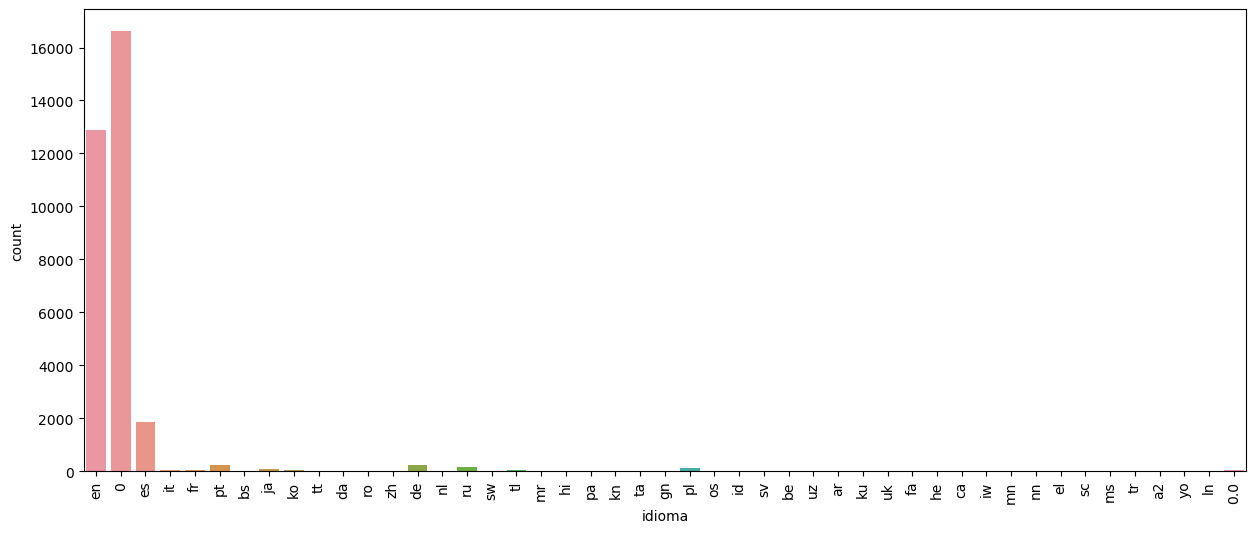

In [ ]:
plt.figure(figsize=(15,6))
plot=sns.countplot(x=df['idioma'])
plt.xlabel("idioma")
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### NOS QUEDAMOS SOLO CON LAS CANCIONES EN INGLÉS

In [ ]:
df_ingles=df[df['idioma']=='en']
len(df_ingles)

12890

In [ ]:
df_ingles.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,idioma
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,en
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,en
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,en
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,en
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,en


c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x600 with 0 Axes>

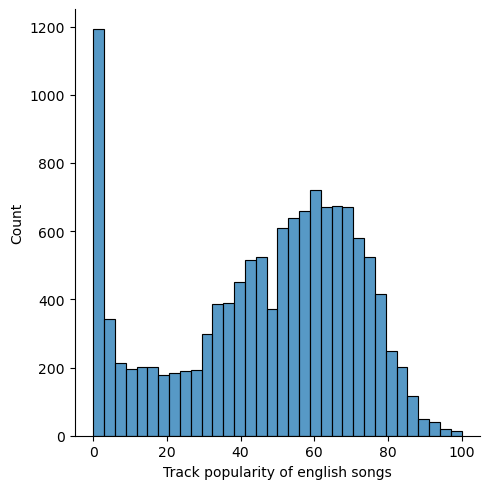

In [ ]:
plt.figure(figsize=(15,6))
plot=sns.displot(x=df_ingles['track_popularity'])
plt.xlabel("Track popularity of english songs")
plt.show()

c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\silvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


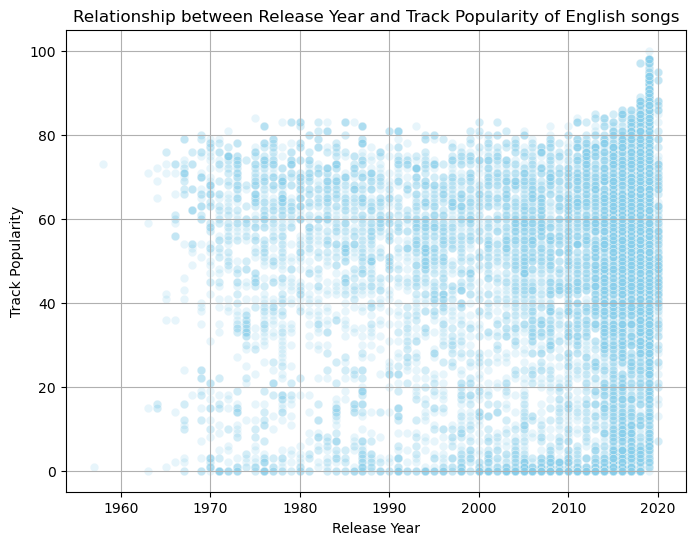

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(data=df_ingles, x='release_year', y='track_popularity', color='skyblue', alpha=0.2)
plt.xlabel('Release Year')
plt.ylabel('Track Popularity')
plt.title('Relationship between Release Year and Track Popularity of English songs')
plt.grid(True)
plt.show()

### BUSCAMOS LAS LETRAS DE LAS 12890 CANCIONES EN INGLÉS

In [ ]:
import bs4
import requests
import warnings
import re
import html
import unidecode
warnings.filterwarnings('ignore')

In [ ]:
df=df_ingles

In [ ]:
# Orden y búsqueda de duplicados
df.sort_values(by=['track_name', 'release_year', 'track_popularity'], ascending=True, inplace=True)
df['duplicados']=df.duplicated(subset=['track_id'], keep='last')
df['duplicados'].sum()

1485

In [ ]:
df=df.loc[df['duplicados']==False]
len(df)

11405

In [ ]:
### Limpieza de títulos y artistas
df2=df.copy()

df2['track_name']=df2['track_name'].str.split('-').str[0]
df2['track_name']=df2['track_name'].str.split('feat').str[0]
df2['track_name']=df2['track_name'].str.replace('(', "")
df2['track_name']=df2['track_name'].str.replace(')', "")
df2['track_name']=df2['track_name'].str.replace('[', "")
df2['track_name']=df2['track_name'].str.replace(']', "")
df2['track_name']=df2['track_name'].str.replace("'", "")
df2['track_name']=df2['track_name'].str.replace(".", "")
df2['track_name']=df2['track_name'].str.replace(":", "")
df2['track_name']=df2['track_name'].str.replace(",", "")
df2['track_name']=df2['track_name'].str.replace("&", "and")
df2['track_name']=df2['track_name'].str.replace("#", "")
df2['track_name']=df2['track_name'].str.replace("$", "")
df2['track_name']=df2['track_name'].str.replace("ä", "a")
df2['track_name']=df2['track_name'].str.replace("ë", "e")
df2['track_name']=df2['track_name'].str.replace("ï", "i")
df2['track_name']=df2['track_name'].str.replace("ö", "o")
df2['track_name']=df2['track_name'].str.replace("ü", "u")

df2['track_artist']=df2['track_artist'].str.replace("'", "")
df2['track_artist']=df2['track_artist'].str.split('vs.').str[0]
df2['track_artist']=df2['track_artist'].str.replace("&", "and")
df2['track_artist']=df2['track_artist'].str.replace("ä", "a")
df2['track_artist']=df2['track_artist'].str.replace("ë", "e")
df2['track_artist']=df2['track_artist'].str.replace("ï", "i")
df2['track_artist']=df2['track_artist'].str.replace("ö", "o")
df2['track_artist']=df2['track_artist'].str.replace("ü", "u")


df2['track_name']=df2['track_name'].str.strip()
df2['track_artist']=df2['track_artist'].str.strip()

In [ ]:
df2.track_artist[:50]

7075                            Big Tymers
6037                            Big Tymers
7410                          Busta Rhymes
12685                         Jimi Hendrix
5223                             Max Frost
6148                             Lil Dicky
12103                                Queen
14503                                Queen
16760                     Paolo Pellegrino
9028                                 Big L
15525                               Eminem
8759                                Eminem
15989                     Blue Öyster Cult
12433                     Blue Öyster Cult
12532                     Blue Öyster Cult
16104                     Blue Öyster Cult
15977                          Bryan Adams
14112                      Fiction Factory
14290                      Fiction Factory
14686    Orchestral Manoeuvres In The Dark
12325                   The Rolling Stones
13121                   The Rolling Stones
15604                   The Rolling Stones
13287      

In [ ]:
df2.track_name[:50]

7075                                           1 Stunna
6037                                           1 Stunna
7410                                            Twerkit
12685                                           20 Fine
5223                                             Dreams
6148                                      ave Dat Money
12103                                                39
14503                                                39
16760                                                74
9028                                       98 Freestyle
15525                                   Till I Collapse
8759                                    Till I Collapse
15989                              Dont Fear The Reaper
12433                              Dont Fear The Reaper
12532                              Dont Fear The Reaper
16104                              Dont Fear The Reaper
15977                   Everything I Do I Do It For You
14112                                 Feels Like

In [ ]:
### BÚSQUEDA DE LYRICS EN GENIUS.COM

def search_lyrics_genius(df, artist_column, song_column):
    lyrics_list = []
    url_list= []

    for index, row in df.iterrows():
        artist = row[artist_column]
        song = row[song_column]
        url = f'https://genius.com/{artist.replace(" ", "-").lower()}-{song.replace(" ", "-").lower()}-lyrics'

        if url in url_list:
            lyrics_list.append('Duplicado')
            print('Duplicado')
        else:
            url_list.append(url)
            try:
                # Request HTML and parse
                html = requests.get(url).content
                soup = bs4.BeautifulSoup(html, 'html.parser')

                # Find lyrics and pre-process
                lyrics = soup.find_all({'div':'data-lyrics-container'}, {'class': 'Lyrics__Container-sc-1ynbvzw-1 kUgSbL'})
                lyrics_song=[]
                for n in range(0,len(lyrics)):
                    lyrics[n] = lyrics[n].text.strip()
                    lyrics[n] = lyrics[n].replace('\n', ' ')
                    lyrics_song.append(lyrics[n])

                if len(lyrics_song)>0:
                    lyrics_list.append(lyrics_song)
                    print(index)
                else:
                    lyrics_list.append(None)
                    print('None')

            except:
                lyrics_list.append(None)
                print('None_except')


    df['lyrics'] = lyrics_list

    return df


In [ ]:
#Búsqueda de todas las letras
df.sort_index(inplace=True)
df=search_lyrics_genius(df, 'track_artist', 'track_name')

None
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
None
19
20
21
23
None
None
26
None
28
29
30
None
32
None
34
35
37
39
None
41
42
43
44
None
46
None
None
49
None
51
52
53
54
55
56
57
58
59
63
64
None
Duplicado
71
Duplicado
73
76
79
80
None
82
Duplicado
None
Duplicado
None
None
90
Duplicado
None
93
94
95
99
None
102
103
105
None
107
108
109
None
112
None
114
115
None
117
119
121
None
130
None
135
138
140
145
None
147
148
None
150
151
153
None
Duplicado
None
157
158
160
161
Duplicado
None
165
None
167
169
None
171
None
174
175
None
Duplicado
178
179
180
None
182
None
None
185
186
None
189
190
None
192
None
None
195
None
198
None
None
202
203
206
Duplicado
None
None
Duplicado
None
Duplicado
214
215
216
None
219
None
None
223
None
225
226
227
None
229
None
231
232
233
None
Duplicado
236
None
None
240
241
242
None
None
246
Duplicado
248
249
252
None
254
257
None
263
None
None
Duplicado
Duplicado
268
269
Duplicado
271
273
274
276
277
280
281
282
283
284
285
287
288
291
None
None
300
301
302
Non

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11405 entries, 0 to 12889
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              11405 non-null  int64  
 1   Unnamed: 0                11405 non-null  int64  
 2   track_id                  11405 non-null  object 
 3   track_name                11405 non-null  object 
 4   track_artist              11405 non-null  object 
 5   track_popularity          11405 non-null  int64  
 6   track_album_id            11405 non-null  object 
 7   track_album_name          11405 non-null  object 
 8   track_album_release_date  11405 non-null  object 
 9   playlist_name             11405 non-null  object 
 10  playlist_id               11405 non-null  object 
 11  playlist_genre            11405 non-null  object 
 12  playlist_subgenre         11405 non-null  object 
 13  danceability              11405 non-null  float64
 14  energy     

In [ ]:
df[df.lyrics=='Duplicado'][['lyrics']].count() # 1608 duplicados -> 9685 not null - duplicados = 8077 canciones con letra

lyrics    1608
dtype: int64

In [ ]:
df['duplicados']=df.duplicated(subset=['lyrics'], keep='last')
#df['duplicados'].sum()
df[df.duplicados==True][['lyrics', 'duplicados']]

,lyrics,duplicados
12824,[[Verse 1: Post Malone]Me and Kurt feel the sa...,True
8601,[[Refrain]There is a house in New OrleansThey ...,True
10500,[[Verse 1]Yesterday I got so oldI felt like I ...,True
11776,[[Verse 1]Whenever I'm alone with youYou make ...,True
6264,"[[Intro][Rappin 4-Tay] No Limit Studios, whass...",True


In [ ]:
df=df.loc[df['duplicados']==False] # Encontramos 5 duplicados más -> 8072 canciones con letra
len(df)

8072

### BUSCAMOS LA POPULARIDAD DEL ARTISTA DE LAS 8072 CANCIONES

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
#client_id = '40387a0db3d740d783fe7b1bd42409d8'
#client_secret = 'df571f7437e74eeead1db9dc623fb2ba'

client_id = '8f0869a3ab4945b08a275d5c592ea4aa'
client_secret = 'dfc89a65a5564c5ba07168401b23d223'


In [ ]:
# Set up authentication
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
def artist_pop(track_id):
    track_info = sp.track(track_id)
    if track_info:
        # Get the artist details from the track information
        artists = track_info['artists']
        art_song = []

        # Retrieve artist information and their popularity
        for artist in artists:
            artist_id = artist['id']
            artist_info = sp.artist(artist_id)
            artist_popularity = artist_info['popularity']
            art_song.append(artist_popularity)

        artist_popularity = sum(art_song)/len(art_song)

    else:
        artist_popularity = None

    return artist_popularity

In [ ]:
track_ids = df['track_id'].values

In [ ]:
track_ids1 = track_ids[:2000]
track_ids2 = track_ids[2000:4000]
track_ids3 = track_ids[4000:]

In [ ]:
n=0
a_popularities = []
for i in range(4):
    auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(auth_manager=auth_manager)
    if i==0:
        for track in track_ids[:2000]:
            popularity = artist_pop(track)
            a_popularities.append(popularity)
            print(n)
            n+=1
    elif i==1:
        for track in track_ids[2000:4000]:
            popularity = artist_pop(track)
            a_popularities.append(popularity)
            print(n)
            n+=1
    elif i==2:
        for track in track_ids[4000:6000]:
            popularity = artist_pop(track)
            a_popularities.append(popularity)
            print(n)
            n+=1
    elif i==3:
        for track in track_ids[6000:]:
            popularity = artist_pop(track)
            a_popularities.append(popularity)
            print(n)
            n+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:
print(a_popularities)

[57.333333333333336, 53.0, 20.0, 66.0, 43.0, 73.0, 52.0, 72.0, 63.0, 76.0, 59.0, 32.0, 83.0, 75.0, 58.0, 16.0, 73.0, 82.0, 47.0, 33.75, 22.5, 60.0, 31.0, 51.0, 61.0, 53.0, 38.0, 59.5, 85.0, 71.0, 73.0, 74.0, 65.0, 31.0, 73.0, 47.666666666666664, 44.0, 74.0, 56.5, 75.0, 73.0, 66.0, 39.0, 40.0, 62.0, 48.666666666666664, 58.0, 60.0, 73.0, 65.0, 39.0, 77.0, 79.66666666666667, 35.0, 70.0, 69.0, 85.0, 54.0, 57.0, 39.5, 82.5, 82.0, 42.0, 42.0, 77.0, 49.333333333333336, 50.0, 63.0, 62.0, 67.0, 66.66666666666667, 73.0, 65.0, 55.0, 82.0, 67.0, 49.0, 68.5, 42.0, 22.0, 60.0, 69.0, 57.0, 64.0, 26.0, 52.5, 72.5, 37.0, 35.0, 55.0, 38.0, 86.0, 82.0, 40.5, 75.0, 27.0, 49.0, 62.0, 10.0, 83.5, 41.0, 73.5, 77.0, 73.0, 51.0, 68.0, 57.0, 64.0, 67.0, 79.5, 72.0, 36.0, 78.33333333333333, 75.0, 59.0, 40.0, 45.0, 62.0, 58.0, 30.0, 52.0, 73.0, 61.5, 74.0, 57.0, 62.0, 48.0, 45.0, 55.0, 60.0, 67.0, 55.0, 64.0, 35.0, 81.0, 61.0, 66.0, 58.0, 42.0, 55.0, 70.0, 51.333333333333336, 65.0, 81.66666666666667, 44.0, 61.0, 

In [ ]:
a_popularities = a_popularities.split(',')

In [ ]:
# string representation of list to list using strip and split
ini_list = a_popularities

# printing initialized string of list and its type
print("initial string", ini_list)
print(type(ini_list))

# Converting string to list
res = ini_list.split(', ')

# printing final result and its type
print("final list", res)
print(type(res))

initial string 63.0, 77.0, 71.5, 13.0, 71.0, 51.0, 68.0, 22.0, 77.0, 45.0, 67.0, 59.0, 56.0, 43.0, 69.0, 70.0, 58.0, 75.5, 63.0, 68.0, 46.0, 78.5, 70.0, 52.0, 65.66666666666667, 67.0, 62.0, 68.0, 76.0, 46.0, 45.0, 22.0, 78.0, 77.0, 58.0, 100.0, 74.25, 58.0, 86.0, 39.666666666666664, 61.0, 66.0, 57.0, 61.0, 42.0, 86.5, 58.0, 43.0, 77.66666666666667, 74.0, 43.0, 47.0, 60.0, 48.0, 46.0, 82.0, 61.0, 73.0, 77.0, 56.0, 72.0, 72.0, 20.0, 18.0, 56.75, 63.0, 65.0, 78.33333333333333, 27.0, 62.0, 52.0, 36.0, 82.0, 87.0, 69.5, 73.0, 35.0, 75.0, 70.0, 86.0, 52.0, 46.0, 56.0, 81.0, 59.0, 68.0, 50.0, 54.0, 83.0, 69.0, 51.0, 20.0, 73.0, 25.0, 47.0, 64.0, 69.0, 64.5, 8.0, 59.0, 84.0, 51.0, 70.0, 30.0, 68.5, 72.0, 67.0, 55.0, 39.5, 72.0, 72.0, 49.5, 31.0, 86.0, 60.0, 70.0, 46.0, 57.0, 48.5, 67.0, 66.0, 86.0, 49.0, 32.0, 35.0, 52.0, 29.0, 68.0, 72.0, 67.0, 9.5, 45.0, 61.0, 59.0, 46.0, 57.0, 47.0, 62.0, 60.0, 67.0, 56.5, 82.0, 71.5, 66.0, 82.0, 78.0, 45.0, 53.0, 50.5, 78.0, 27.5, 64.0, 83.0, 59.0, 59.0, 8

In [ ]:
df['artist_popularity'] = res

In [ ]:
df.to_csv('df_songs_lang_lyrics_8072.csv', index=False)